# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np


# Read data 

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()




##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system, but for this homework this is not really necessary as  the features are homogeneous (pixels) and all necessary.


In [ ]:
# print shape
print('Data Dimensionality: ')

print (X_train.shape)

# print first 5 rows in your dataset
print('Head of Data: ')

X_train_flattened = X_train.flatten().reshape(len(y_train),784)

X_test_flattened = X_test.flatten().reshape(len(y_test),784)


train_dataframe = pd.DataFrame(X_train_flattened)
train_dataframe['label'] = y_train


train_dataframe.head()






Data Dimensionality: 
(60000, 28, 28)
Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

# Shuffle the training data

X_train_flattened, y_train = shuffle(X_train_flattened, y_train)



# Split 80-20

from sklearn.model_selection import train_test_split





X_tra, X_valid, y_tra, y_valid = train_test_split(X_train_flattened, y_train, test_size=0.2)
print("Train data shape:", X_tra.shape, "Train label shape:", y_tra.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)





Train data shape: (48000, 784) Train label shape: (48000,) Validation data shape: (12000, 784) Validation label shape: (12000,)


##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


0.1441504546957672


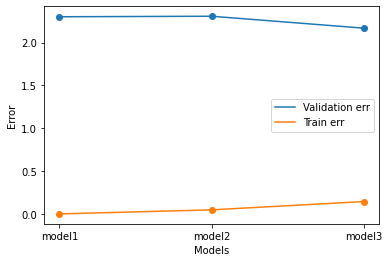

In [ ]:

# Train decision tree classifiers

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


min_samples_splits = [2, 5, 10]

train_acc = []
val_acc = []

for min_samples_split in min_samples_splits:
  
  clf = DecisionTreeRegressor(min_samples_split=min_samples_split)
  clf.fit(X_tra,y_tra)
  
  train_pred = clf.predict(X_tra)
  train_results = mean_squared_error(y_tra, train_pred)
  train_acc.append(train_results)

# Evaluate on validation set


  val_pred = clf.predict(X_valid)
  val_results = mean_squared_error(y_valid, val_pred)
  val_acc.append(val_results)


print(train_results)

# Plot errors

import matplotlib.pyplot as plt
x_axis = ['model1', 'model2', 'model3']
plt.scatter(x_axis, val_acc)
plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation err")
plt.plot(x_axis, train_acc, label = "Train err")
plt.xlabel('Models')
plt.ylabel('Error')
plt.legend()
plt.show()



## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
# test prediction using a decision tree with all default parameters and ..... min-split value 

clf = DecisionTreeRegressor(min_samples_split=min_samples_splits[val_acc.index(min(val_acc))])
clf.fit(X_train_flattened,y_train)
  
test_pred = clf.predict(X_test_flattened)
test_result = mean_squared_error(y_train, train_pred)



# Report your accuracy

print(val_results)

print(test_result)


2.1675926981240026
0.1311849404761905
